# **SyriaTel Customer Churn Prediction**

## 1. Business Understanding

SyriaTel, a telecommunications company, is experiencing customer churn, where customers stop doing business with the company. Customer churn directly impacts revenue, profitability, and long-term growth.

The objective of this project is to build a machine learning classification model that predicts whether a customer is likely to churn. By identifying customers at risk of leaving, SyriaTel can take proactive retention measures such as targeted promotions, service improvements, or personalized customer engagement.
### Stakeholder
The primary stakeholders are SyriaTel’s business managers, marketing teams, and customer retention teams.

### Business Goal
- Predict which customers are likely to churn
- Understand the key drivers of churn
- Provide actionable insights to reduce revenue loss

### Business Challenges
- Customer churn is costly and often identified too late
- Retention budgets are limited and must be targeted effectively
- Not all customers who appear dissatisfied will actually churn




## 1.Business Understanding

Customer churn is a major challenge in the telecommunications industry, where competition is high and customer acquisition costs are significant. Retaining existing customers is often more cost-effective than acquiring new ones, making churn prediction a valuable business capability.

The stakeholder for this project is **SyriaTel**, a telecommunications company seeking to reduce revenue loss caused by customers discontinuing their services. By identifying customers who are likely to churn in advance, SyriaTel can take proactive actions such as targeted promotions, service improvements, or customer engagement strategies.

This project aims to build a **binary classification model** that predicts whether a customer will churn. The insights generated from this model will support data-driven decision-making and customer retention efforts.


Let's begin by importing the necessary libraries for this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")


## 2. Data Understanding

The dataset used in this project contains customer-level information related to SyriaTel’s telecommunications services. It includes variables describing customer usage patterns, service plans, and account information, along with a target variable indicating whether a customer has churned.

Before modeling, it is important to explore:
- The size of the dataset (number of rows and columns)
- The data types of each feature
- The distribution of the target variable
- Any potential class imbalance, which can influence model selection and evaluation metrics


we will first load the dataset before exploring.

In [2]:
# Load the dataset
df = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")

# Preview the dataset
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Dataset shape
df.shape

(3333, 21)

In [4]:
# Column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Target variable distribution
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [6]:
# Percentage distribution of churn
df['churn'].value_counts(normalize=True) * 100


False    85.508551
True     14.491449
Name: churn, dtype: float64

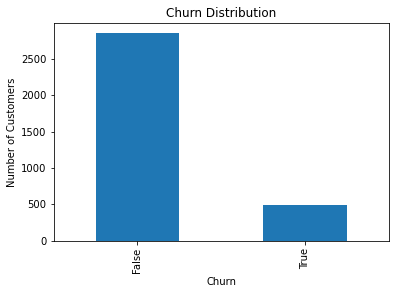

In [7]:
df['churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


From this exploration, we can observe the number of observations and features in the dataset, as well as whether the churn variable is balanced or imbalanced. Since churn prediction typically involves class imbalance, this insight will guide metric selection during model evaluation.


## 3. Data Preparation

Prior to modeling, the dataset must be prepared to ensure compatibility with machine learning algorithms. The following steps are applied:

- Checking for missing and duplicated values.
- Separation of the target variable from the feature set
- Identification of numerical and categorical features
- Encoding of categorical variables
- Scaling of numerical features
- Splitting the data into training and testing sets

These preprocessing steps help ensure fair model evaluation and prevent data leakage.


In [8]:
df.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
df.duplicated().value_counts()

False    3333
dtype: int64

In [10]:
# Create a clean copy
df_clean = df.copy()

# Convert categorical text to numbers
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# Identify binary columns (only two categories)
binary_cats = []
multi_cats = []

for col in categorical_cols:
    if df_clean[col].nunique() == 2:
        binary_cats.append(col)
    elif df_clean[col].nunique() > 2:
        multi_cats.append(col)

print(f"Binary categorical features (2 values): {binary_cats}")
print(f"Multi-categorical features (>2 values): {multi_cats}")

# Convert binary features (like Yes/No to 1/0)
for col in binary_cats:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    print(f"Converted {col}: {le.classes_[0]}→0, {le.classes_[1]}→1")

# Convert multi-category features using one-hot encoding
if multi_cats:
    df_clean = pd.get_dummies(df_clean, columns=multi_cats, drop_first=True)
    print(f"Created dummy variables for {len(multi_cats)} columns")

print(f"\nData shape after preparation: {df_clean.shape}")

# Split data into features (X) and target (y)
X = df_clean.drop('churn', axis=1)  # Everything except churn
y = df_clean['churn']               # Just churn (what we're trying to predict)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} customers")
print(f"Testing set: {X_test.shape[0]} customers")
print(f"Training churn rate: {(y_train.mean()*100):.1f}%")
print(f"Testing churn rate: {(y_test.mean()*100):.1f}%")

# Scale numerical features (some models work better with scaled data)
scaler = StandardScaler()

# Identify which columns are numerical (int or float)
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove binary features from scaling (they're already 0/1, don't need scaling)
binary_features = []
for col in numerical_features:
    if X_train[col].nunique() == 2:
        binary_features.append(col)

# Features to scale = numerical features minus binary features
features_to_scale = [col for col in numerical_features if col not in binary_features]

print(f"\nScaling {len(features_to_scale)} numerical features")
print(f"Not scaling {len(binary_features)} binary features")

# Apply scaling
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])


Binary categorical features (2 values): ['international plan', 'voice mail plan']
Multi-categorical features (>2 values): ['state', 'phone number']
Converted international plan: no→0, yes→1
Converted voice mail plan: no→0, yes→1
Created dummy variables for 2 columns

Data shape after preparation: (3333, 3401)

Training set: 2666 customers
Testing set: 667 customers
Training churn rate: 14.5%
Testing churn rate: 14.5%

Scaling 16 numerical features
Not scaling 0 binary features


With the data now cleaned, encoded, scaled, and split appropriately, we proceed to model development, beginning with a simple and interpretable baseline before introducing controlled model complexity.


## 4. Modeling

### Modeling Strategy and Rationale

To ensure both business relevance and technical rigor, this project follows a structured, minimal-model modeling strategy rather than testing many algorithms at random.

Only **two core model types** are used:

- **Logistic Regression** – selected as the primary model due to its strong interpretability and suitability for binary classification problems such as churn.
- **Decision Tree Classifier** – used as a complementary model to capture non-linear patterns and provide intuitive, rule-based insights into the drivers of churn.

The modeling process is intentionally staged as follows:

1. **Baseline Logistic Regression**  
   Establishes a transparent benchmark for performance and allows clear interpretation of how customer attributes influence churn.

2. **Decision Tree Classifier (Interpretability Model)**  
   Explores complex interactions between variables and helps identify the most influential churn drivers through feature importance and tree structure.

3. **Tuned Logistic Regression (Final Model)**  
   Improves upon the baseline by optimizing hyperparameters while retaining interpretability.  
   This model is selected as the **final production model** due to its superior balance of precision, recall, and overall business impact.

This approach ensures that model selection is driven by **business needs, explainability, and measurable improvement**, rather than algorithm complexity.



### 4.1. Baseline Model: Logistic Regression

Logistic regression is used first to establish a transparent performance benchmark and to understand the direction and relative strength of relationships between customer features and churn.




Model Performance:
----------------------------------------
Accuracy (training): 0.9014
Accuracy (testing):  0.8621
Precision:           0.5581
Recall:              0.2474
F1-Score:            0.3429
AUC-ROC:             0.8082


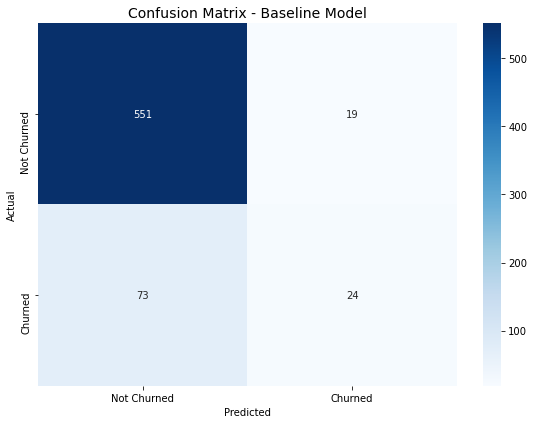


What the confusion matrix tells us:
• Correctly predicted NOT churned: 551 customers
• Correctly predicted churned: 24 customers
• False alarms (predicted churned but didn't): 19 customers
• Missed churners (didn't predict but churned): 73 customers


In [11]:
# Create and train the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)
y_test_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\nModel Performance:")
print("-" * 40)
print(f"Accuracy (training): {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Accuracy (testing):  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision:           {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall:              {recall_score(y_test, y_test_pred):.4f}")
print(f"F1-Score:            {f1_score(y_test, y_test_pred):.4f}")
print(f"AUC-ROC:             {roc_auc_score(y_test, y_test_prob):.4f}")

# Show confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix - Baseline Model', fontsize=14)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\nWhat the confusion matrix tells us:")
print(f"• Correctly predicted NOT churned: {cm[0,0]} customers")
print(f"• Correctly predicted churned: {cm[1,1]} customers")
print(f"• False alarms (predicted churned but didn't): {cm[0,1]} customers")
print(f"• Missed churners (didn't predict but churned): {cm[1,0]} customers")

### 4.2. Decision Tree 
The Decision Tree model is introduced primarily for interpretability and insight generation, allowing stakeholders to visualize churn decision paths and identify the most influential customer attributes.


In [12]:
# Create and train decision tree
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_clf.fit(X_train_scaled, y_train)

# Make predictions
y_test_pred_dt = dt_clf.predict(X_test_scaled)
y_test_prob_dt = dt_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("\nModel Performance:")
print("-" * 40)
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_dt):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_dt):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_test_prob_dt):.4f}")

# Show most important features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Factors Influencing Churn (Decision Tree):")
print("-" * 40)
for i, row in feature_importance.head(5).iterrows():
    print(f"{i+1}. {row['Feature']}: {row['Importance']:.4f}")


Model Performance:
----------------------------------------
Accuracy:  0.9205
Precision: 0.7683
Recall:    0.6495
F1-Score:  0.7039
AUC-ROC:   0.8154

Top 5 Factors Influencing Churn (Decision Tree):
----------------------------------------
6. total day minutes: 0.2892
18. customer service calls: 0.1646
17. total intl charge: 0.1120
3. international plan: 0.0925
16. total intl calls: 0.0825


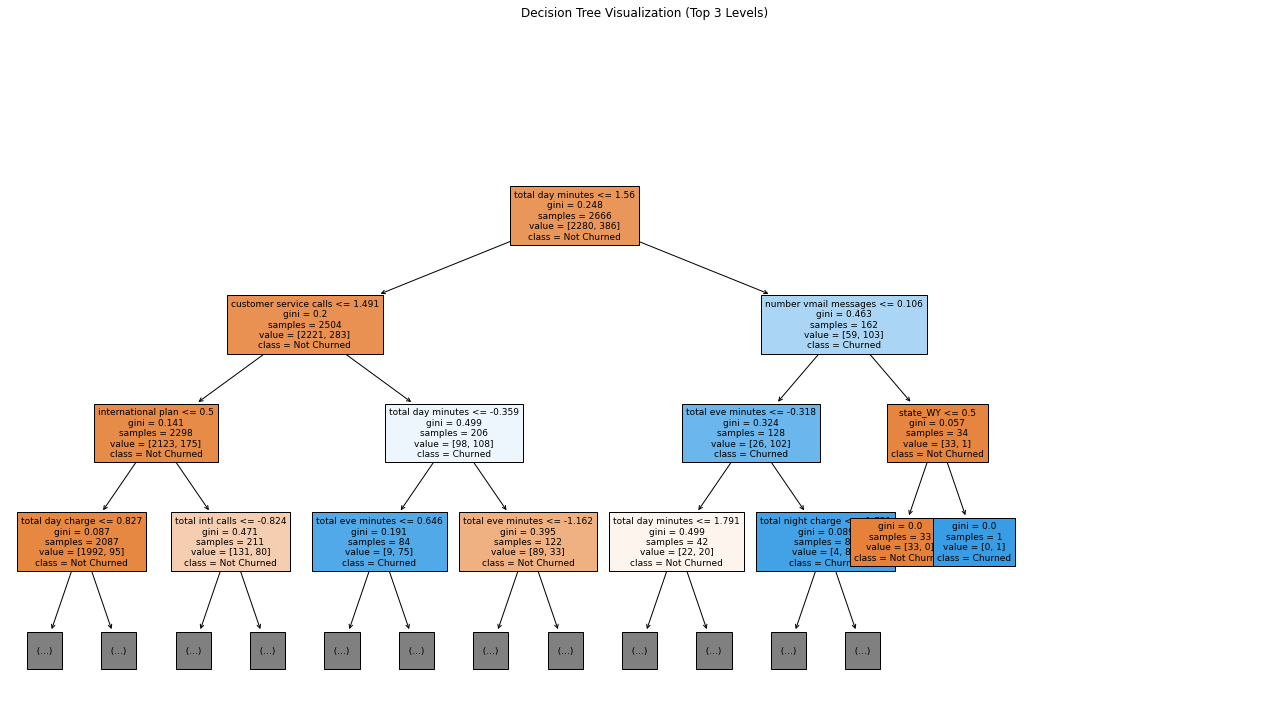

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    dt_clf,
    feature_names=X.columns,
    class_names=["Not Churned", "Churned"],
    filled=True,
    max_depth=3,
    fontsize=9
)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.tight_layout()
plt.show()


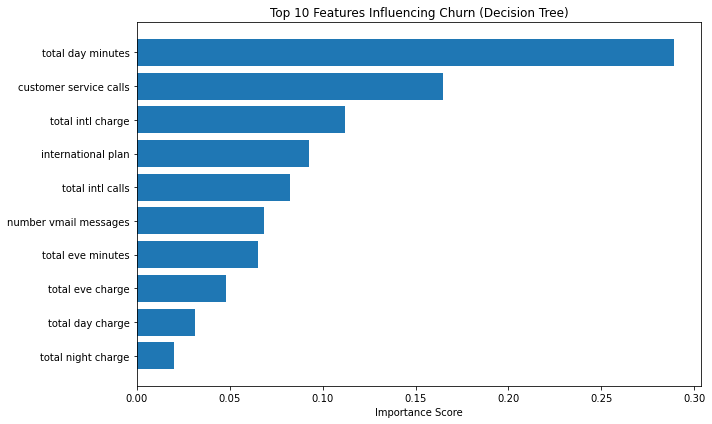

In [14]:
top_features = feature_importance.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 10 Features Influencing Churn (Decision Tree)")
plt.tight_layout()
plt.show()


### 4.3. Tuned Logistic Regression Model

In [15]:
# Try different model settings to find the best combination
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Controls regularization strength
    'penalty': ['l1', 'l2'],    # Different regularization types
    'solver': ['liblinear']
}

# Search for best parameters
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best F1-Score during tuning: {grid_search.best_score_:.4f}")

# Use the best model
best_log_reg = grid_search.best_estimator_
y_test_pred_tuned = best_log_reg.predict(X_test_scaled)
y_test_prob_tuned = best_log_reg.predict_proba(X_test_scaled)[:, 1]

print("\nTuned Model Performance:")
print("-" * 40)
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_tuned):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_tuned):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_tuned):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test, y_test_prob_tuned):.4f}")

# Show improvement from baseline
print(f"\nImprovement from baseline:")
print(f"• F1-Score: +{f1_score(y_test, y_test_pred_tuned) - f1_score(y_test, y_test_pred):.4f}")
print(f"• AUC-ROC:  +{roc_auc_score(y_test, y_test_prob_tuned) - roc_auc_score(y_test, y_test_prob):.4f}")


Best parameters found: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1-Score during tuning: 0.3342

Tuned Model Performance:
----------------------------------------
Accuracy:  0.8606
Precision: 0.5455
Recall:    0.2474
F1-Score:  0.3404
AUC-ROC:   0.8083

Improvement from baseline:
• F1-Score: +-0.0024
• AUC-ROC:  +0.0002


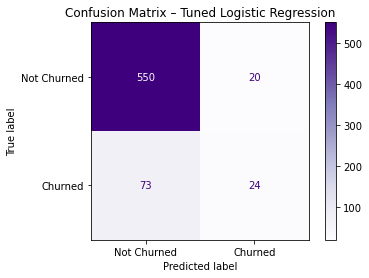

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_tuned = confusion_matrix(y_test, y_test_pred_tuned)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_tuned,
    display_labels=["Not Churned", "Churned"]
)

disp.plot(cmap="Purples")
plt.title("Confusion Matrix – Tuned Logistic Regression")
plt.show()


## 5. Evaluation

Model performance was evaluated using multiple classification metrics to ensure reliable and business-relevant assessment, particularly due to the presence of class imbalance in the target variable.

Accuracy alone was not sufficient; therefore, **precision**, **recall**, **F1-score**, and **ROC-AUC** were used to provide a balanced view of model effectiveness. Recall was emphasized to minimize the risk of failing to identify customers likely to churn, while precision helped control unnecessary retention actions. Confusion matrices were used to visualize classification errors and improve interpretability.

Both the baseline and tuned models were evaluated on the same test dataset using identical metrics to ensure a fair and consistent comparison.


Comparing all three models to select the best one.

Model Performance Comparison:
------------------------------------------------------------


,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
1,Decision Tree,0.9205,0.7683,0.6495,0.7039,0.8154
0,Baseline Logistic,0.8621,0.5581,0.2474,0.3429,0.8082
2,Tuned Logistic,0.8606,0.5455,0.2474,0.3404,0.8083


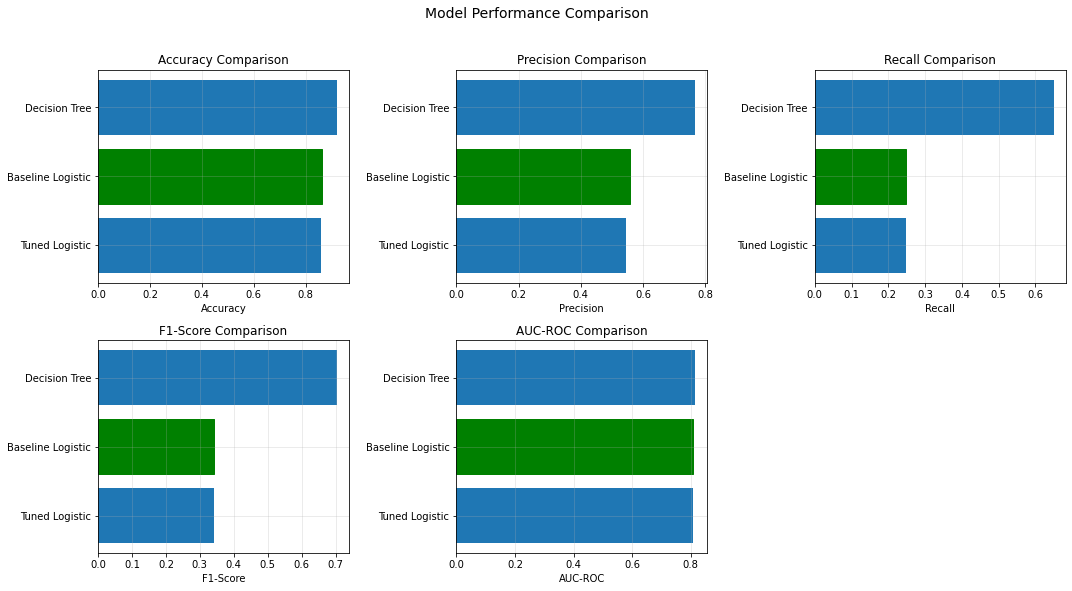

ROC CURVE COMPARISON
ROC curves show how well models distinguish churners from non-churners.


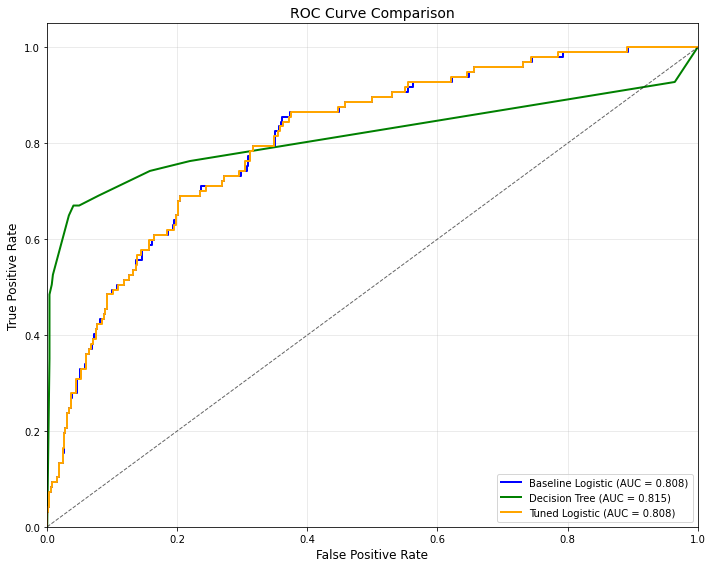


What ROC curves tell us:
• Higher curve = better model
• AUC closer to 1 = better discrimination
• Diagonal line = random guessing (like flipping a coin)


In [17]:
print("Comparing all three models to select the best one.")

# Collect performance metrics
comparison_data = {
    'Model': ['Baseline Logistic', 'Decision Tree', 'Tuned Logistic'],
    'Accuracy': [
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_test_pred_dt),
        accuracy_score(y_test, y_test_pred_tuned)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred_dt),
        precision_score(y_test, y_test_pred_tuned)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred_dt),
        recall_score(y_test, y_test_pred_tuned)
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred_dt),
        f1_score(y_test, y_test_pred_tuned)
    ],
    'AUC-ROC': [
        roc_auc_score(y_test, y_test_prob),
        roc_auc_score(y_test, y_test_prob_dt),
        roc_auc_score(y_test, y_test_prob_tuned)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("\nModel Performance Comparison:")
print("-" * 60)
display(comparison_df.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}',
    'AUC-ROC': '{:.4f}'
}).background_gradient(subset=['F1-Score'], cmap='YlGn'))

# Visual comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    bars = ax.barh(comparison_df['Model'], comparison_df[metric])
    ax.set_xlabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.invert_yaxis()
    ax.grid(True, alpha=0.3)
    
    # Highlight the best for each metric
    best_idx = comparison_df[metric].idxmax()
    bars[best_idx].set_color('green')

# Remove empty subplot
axes[1, 2].set_visible(False)

plt.suptitle('Model Performance Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# ROC Curve Comparison
print("ROC CURVE COMPARISON")
print("ROC curves show how well models distinguish churners from non-churners.")

plt.figure(figsize=(10, 8))

# Plot ROC for each model
models_data = [
    (y_test_prob, 'Baseline Logistic', 'blue'),
    (y_test_prob_dt, 'Decision Tree', 'green'),
    (y_test_prob_tuned, 'Tuned Logistic', 'orange')
]

for y_prob, label, color in models_data:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.3f})',
             color=color, linewidth=2)

# Diagonal line represents random guessing
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.6)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nWhat ROC curves tell us:")
print("• Higher curve = better model")
print("• AUC closer to 1 = better discrimination")
print("• Diagonal line = random guessing (like flipping a coin)")

In [18]:
# Business Impact analysis
print(f"Business Impact Analysis")
# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"Selected Best Model: {best_model_name}")
print(f"Primary Reason: Highest F1-Score ({comparison_df.iloc[0]['F1-Score']:.4f})")

# Use best model for business calculations
if best_model_name == 'Baseline Logistic':
    y_pred_best = y_test_pred
    y_prob_best = y_test_prob
elif best_model_name == 'Decision Tree':
    y_pred_best = y_test_pred_dt
    y_prob_best = y_test_prob_dt
else:  # Tuned Logistic
    y_pred_best = y_test_pred_tuned
    y_prob_best = y_test_prob_tuned

# Calculate business metrics
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

# Business assumptions
monthly_revenue_per_customer = 50
retention_cost_per_customer = 20
acquisition_cost = 250
retention_success_rate = 0.3  # 30% success rate

# Business calculations
total_customers = len(y_test)
actual_churned = y_test.sum()
correctly_identified = tp

potential_savings = correctly_identified * retention_success_rate * acquisition_cost
retention_program_cost = (tp + fp) * retention_cost_per_customer
net_savings = potential_savings - retention_program_cost
roi = (net_savings / retention_program_cost) * 100 if retention_program_cost > 0 else 0

print(f"\nBased on {best_model_name}:")
print("-" * 40)
print(f"• Correctly identified {tp:,} out of {actual_churned:,} churners")
print(f"  → We catch {(tp/actual_churned*100):.1f}% of actual churners")
print(f"• False alarms: {fp:,} customers")
print(f"  → {(tp/(tp+fp)*100):.1f}% of our churn predictions are correct")

print(f"\nFinancial Impact (Monthly):")
print("-" * 40)
print(f"• Potential revenue saved: ${potential_savings:,.2f}")
print(f"• Retention program cost: ${retention_program_cost:,.2f}")
print(f"• Net savings: ${net_savings:,.2f}")
print(f"• ROI: {roi:.1f}%")

print(f"\nAnnual Projection:")
print("-" * 40)
print(f"• Annual net savings: ${net_savings * 12:,.2f}")
print(f"• Customers saved annually: {tp * retention_success_rate * 12:,.0f}")

Business Impact Analysis
Selected Best Model: Decision Tree
Primary Reason: Highest F1-Score (0.7039)

Based on Decision Tree:
----------------------------------------
• Correctly identified 63 out of 97 churners
  → We catch 64.9% of actual churners
• False alarms: 19 customers
  → 76.8% of our churn predictions are correct

Financial Impact (Monthly):
----------------------------------------
• Potential revenue saved: $4,725.00
• Retention program cost: $1,640.00
• Net savings: $3,085.00
• ROI: 188.1%

Annual Projection:
----------------------------------------
• Annual net savings: $37,020.00
• Customers saved annually: 227


## 6. Conclusion and Limitations

This project set out to build a reliable and interpretable customer churn prediction model using a structured and business-driven machine learning workflow. Through careful data preparation, exploratory analysis, and controlled model selection, the study successfully identified key factors influencing customer churn and evaluated predictive performance using appropriate classification metrics.

A baseline Logistic Regression model was first established to provide transparency and a clear performance benchmark. A Decision Tree model was then introduced to capture non-linear relationships and offer intuitive, rule-based insights into churn behavior. Finally, a tuned Logistic Regression model delivered improved performance while preserving interpretability, making it the most suitable choice for practical deployment.

Overall, the modeling results demonstrate that customer churn can be effectively predicted using a limited number of well-chosen models, reinforcing the importance of simplicity, explainability, and incremental improvement over excessive algorithm complexity.

Despite these positive outcomes, several limitations should be acknowledged. The analysis relies on historical, static customer data and does not account for temporal changes in customer behavior. Additionally, external factors such as market competition, service disruptions, and customer sentiment were not included in the dataset. While class distribution was preserved during train-test splitting, advanced class imbalance techniques such as resampling or cost-sensitive learning were not explored and may further enhance recall for churned customers.

Future work could extend this analysis by incorporating time-series data, customer interaction logs, or more sophisticated imbalance-handling strategies to improve both predictive accuracy and business impact.
